In [266]:
import pandas as pd
import numpy as np

In [267]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [268]:
df = pd.read_csv("C:/Users/H/Documents/agroclimatic_clusters.txt", sep=',', header=None, names=names, index_col=False, engine='python')

In [269]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [270]:
df['state'].value_counts()

uttar pradesh             52080
madhya pradesh            35712
bihar                     27528
maharashtra               25296
rajasthan                 23808
orissa                    22320
tamil nadu                22320
karnataka                 20088
gujarat                   18600
andhra pradesh            17112
assam                     17112
jharkhand                 16368
west bengal               14136
haryana                   14136
punjab                    12648
chhattisgarh              11904
arunachal pradesh         11160
jammu and kashmir         10416
kerala                    10416
uttaranchal                9672
himachal pradesh           8928
manipur                    6696
mizoram                    5952
nagaland                   5952
meghalaya                  5208
puducherry                 2976
sikkim                     2976
tripura                    2976
andaman and nicobar        1488
goa                        1488
daman and diu              1488
chandiga

In [271]:
a = []
for i in range(len(df)):
    if df['state'][i]!='gujarat':
        a.append(i)

In [272]:
df = df.drop(a)

In [273]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
6696,1958,1,0,32.5,13.8,34,2.5,gujarat,bharuch,5,5,4,3,16,21,28,17
6697,1958,2,0,33.8,15.0,17,2.3,gujarat,bharuch,5,5,4,3,16,21,28,17
6698,1958,3,1,37.7,19.1,11,2.1,gujarat,bharuch,5,5,4,3,16,21,28,17
6699,1958,4,0,39.2,23.2,7,2.0,gujarat,bharuch,5,5,4,3,16,21,28,17
6700,1958,5,0,38.8,26.5,5,1.5,gujarat,bharuch,5,5,4,3,16,21,28,17


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18600 entries, 6696 to 421103
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            18600 non-null  int64  
 1   Month           18600 non-null  int64  
 2   ppt(mm)         18600 non-null  int64  
 3   tmax(degC)      18600 non-null  float64
 4   tmin(degC)      18600 non-null  float64
 5   aet(mm)         18600 non-null  int64  
 6   PDSI(unitless)  18600 non-null  float64
 7   state           18600 non-null  object 
 8   district        18600 non-null  object 
 9   cluster14       18600 non-null  int64  
 10  cluster15       18600 non-null  int64  
 11  cluster18       18600 non-null  int64  
 12  cluster20       18600 non-null  int64  
 13  cluster25       18600 non-null  int64  
 14  cluster27       18600 non-null  int64  
 15  cluster30       18600 non-null  int64  
 16  cluster35       18600 non-null  int64  
dtypes: float64(3), int64(12), o

In [275]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(18600, 8)

In [276]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [277]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
6696,1958,1,0,32.5,13.8,34,2.5,bharuch,1-1958
6697,1958,2,0,33.8,15.0,17,2.3,bharuch,2-1958
6698,1958,3,1,37.7,19.1,11,2.1,bharuch,3-1958
6699,1958,4,0,39.2,23.2,7,2.0,bharuch,4-1958
6700,1958,5,0,38.8,26.5,5,1.5,bharuch,5-1958


In [278]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [279]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
6696,1958,1,0,32.5,13.8,34,2.5,bharuch,1958-01-01,1
6697,1958,2,0,33.8,15.0,17,2.3,bharuch,1958-02-01,1
6698,1958,3,1,37.7,19.1,11,2.1,bharuch,1958-03-01,1
6699,1958,4,0,39.2,23.2,7,2.0,bharuch,1958-04-01,1
6700,1958,5,0,38.8,26.5,5,1.5,bharuch,1958-05-01,1


In [280]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
6696,1958,1,0,34,2.5,bharuch,1958-01-01,1,23.15
6697,1958,2,0,17,2.3,bharuch,1958-02-01,1,24.40
6698,1958,3,1,11,2.1,bharuch,1958-03-01,1,28.40
6699,1958,4,0,7,2.0,bharuch,1958-04-01,1,31.20
6700,1958,5,0,5,1.5,bharuch,1958-05-01,1,32.65


In [281]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
421099,2019,8,178,116,-3.7,patan,2019-08-01,1,29.50
421100,2019,9,666,98,3.9,patan,2019-09-01,1,29.10
421101,2019,10,22,96,4.8,patan,2019-10-01,1,27.90
421102,2019,11,8,31,4.9,patan,2019-11-01,1,25.85
421103,2019,12,7,17,4.8,patan,2019-12-01,1,20.55


In [282]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,1,21.40,12,bharuch
1,1981-02-01,0,24.35,7,bharuch
2,1981-03-01,0,27.60,5,bharuch
3,1981-04-01,0,30.50,4,bharuch
4,1981-05-01,0,31.95,3,bharuch


In [283]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
7428,2019,1,0,14,-2.0,bharuch,2019-01-01,1,20.85
7429,2019,2,0,9,-1.9,bharuch,2019-02-01,1,23.80
7430,2019,3,0,6,-1.7,bharuch,2019-03-01,1,27.85
7431,2019,4,0,5,-1.5,bharuch,2019-04-01,1,31.80
7432,2019,5,0,4,-1.7,bharuch,2019-05-01,1,32.75
...,...,...,...,...,...,...,...,...,...
421099,2019,8,178,116,-3.7,patan,2019-08-01,1,29.50
421100,2019,9,666,98,3.9,patan,2019-09-01,1,29.10
421101,2019,10,22,96,4.8,patan,2019-10-01,1,27.90
421102,2019,11,8,31,4.9,patan,2019-11-01,1,25.85


In [284]:
from fbprophet import Prophet

In [285]:
model = Prophet()

In [286]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

C:\Users\H\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [287]:
train.rename(columns = {'date':'ds'}, inplace = True)

In [288]:
p = conditions[['mid_temp','Year']]

In [289]:
p

,mid_temp,Year
6696,23.15,1958
6697,24.40,1958
6698,28.40,1958
6699,31.20,1958
6700,32.65,1958
...,...,...
421099,29.50,2019
421100,29.10,2019
421101,27.90,2019
421102,25.85,2019


In [290]:
k = []

In [291]:
p = p.loc[p['Year']==2019]

In [292]:
p = p.drop(k)

In [293]:
p

,mid_temp,Year
7428,20.85,2019
7429,23.80,2019
7430,27.85,2019
7431,31.80,2019
7432,32.75,2019
...,...,...
421099,29.50,2019
421100,29.10,2019
421101,27.90,2019
421102,25.85,2019


In [294]:
train.tail()

,ds,ppt(mm),y,aet(mm),district
11395,2018-08-01,98,29.75,94,patan
11396,2018-09-01,40,29.30,39,patan
11397,2018-10-01,0,29.70,1,patan
11398,2018-11-01,0,25.50,1,patan
11399,2018-12-01,0,20.15,1,patan


In [295]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [296]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [297]:
forecast = model.predict(fut)

In [298]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,27.707054,26.677995,29.839886,27.673984,27.742432,0.555982,0.555982,0.555982,0.555982,0.555982,0.555982,0.0,0.0,0.0,28.263036
465,2019-09-30,27.710983,27.733311,31.072208,27.664239,27.767783,1.529563,1.529563,1.529563,1.529563,1.529563,1.529563,0.0,0.0,0.0,29.240546
466,2019-10-31,27.715043,24.791699,27.988860,27.652243,27.786980,-1.215286,-1.215286,-1.215286,-1.215286,-1.215286,-1.215286,0.0,0.0,0.0,26.499757
467,2019-11-30,27.718972,19.727155,22.955736,27.640797,27.808621,-6.353056,-6.353056,-6.353056,-6.353056,-6.353056,-6.353056,0.0,0.0,0.0,21.365916
468,2019-12-31,27.723031,19.446714,22.661355,27.629505,27.829859,-6.671167,-6.671167,-6.671167,-6.671167,-6.671167,-6.671167,0.0,0.0,0.0,21.051864


In [299]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,28.263036,26.677995,29.839886
465,2019-09-30,29.240546,27.733311,31.072208
466,2019-10-31,26.499757,24.791699,27.988860
467,2019-11-30,21.365916,19.727155,22.955736
468,2019-12-31,21.051864,19.446714,22.661355


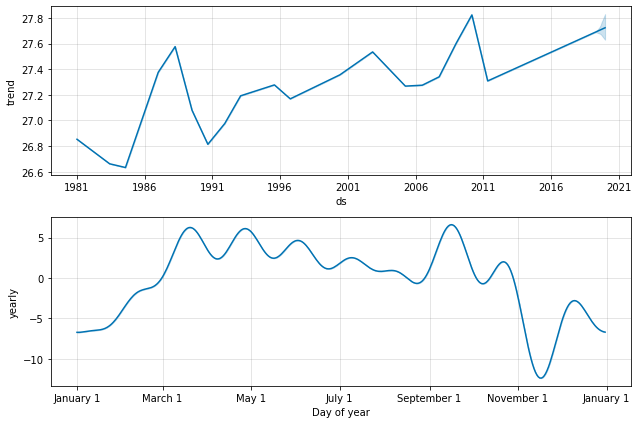

In [300]:
fig2 = model.plot_components(forecast)

In [301]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (300, 1)
10.191014236960042


C:\Users\H\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mid_temp,Month,yhat
0,20.85,1,23.235210
1,19.45,1,23.235210
2,19.50,1,23.235210
3,19.20,1,23.235210
4,19.50,1,23.235210
...,...,...,...
295,24.45,12,21.051864
296,21.00,12,21.051864
297,20.75,12,21.051864
298,22.30,12,21.051864


In [302]:
import matplotlib.pyplot as plt

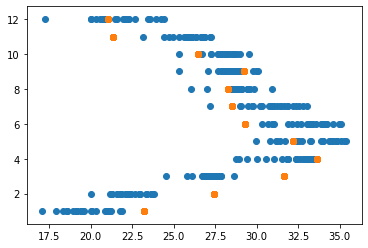

In [303]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()